# Lab 1. Crash course intro to R.

## Goals

This lab will give you the tools to start off with R code. When you do your homework, **you've got to consult lab, lecture notes, and if you're being clever about it, Google and Stackoverflow.**

<img src="graphics/graphics.001.jpeg" width=500>

1. Load in and look at data
2. Take a first look at the libraries `ggplot2` and `dplyr`
    - `dplyr` is for manipulating your data
        - pipe operator `%>%`
        - `mutate()`
    - `ggplot` is for plotting
        - `geom_histogram()`

3. How to write code and text into Rmd

## 1. Let's look at the data
Start off with `read_csv` from the `readr` library.

In [27]:
library(readr)

### Where is my data?
Check out the files pane. To get your data into R, you have to give the computer its **file path**. From the files pane, you can see two folders, one named Code and the other named Data. My file paths are different than yours! Be careful.

In [28]:
CS_data <- read_csv("data/Cesarean.csv")
head(CS_data)

Parsed with column specification:
cols(
  Country_Name = col_character(),
  CountryCode = col_character(),
  Births_Per_1000 = col_integer(),
  Income_Group = col_character(),
  Region = col_character(),
  GDP_2006 = col_double(),
  CS_rate = col_double()
)


Country_Name         CountryCode Births_Per_1000 Income_Group        
1 Albania              ALB          46             Upper middle income 
2 Andorra              AND           1             High income: nonOECD
3 United Arab Emirates ARE          63             High income: nonOECD
4 Argentina            ARG         689             High income: nonOECD
5 Armenia              ARM          47             Lower middle income 
6 Australia            AUS         267             High income: OECD   
  Region                     GDP_2006  CS_rate
1 Europe & Central Asia       3051.768 0.256  
2 Europe & Central Asia      42417.229 0.237  
3 Middle East & North Africa 42950.101 0.100  
4 Latin America & Caribbean   6649.414 0.352  
5 Europe & Central Asia       2126.619 0.141  
6 East Asia & Pacific        36100.559 0.303

### Breakdown of above
Okay, so what did we just see here?

`CS_data` is the name of our **object**. This is something we're telling the computer to remember. In this case, we're telling the computer that the dataset found at `"lab_1/data/Cesarean.csv"` is called `CS_data`.

`CS_data` (the file) `<-` (remember) `"lab_1/data/Cesarean.csv"` (from here).

### Dataframe
We will refer to the data as dataframes. If you run `class(CS_data)` on your computer, you will see that, according to the computer, `CS_data` is a dataframe! There are other object types in R. For now, just learn this one.

Dataframe may be abbreviated to `df`.

### What can we figure out from the data?
- We can totally look at it with our own eyes to come up with some insights.
- Sometimes, we can't spot patterns by just our eyes!
- What'll be easier is to learn some code so the computer can speed up the understanding/insight process for us

We're going to use some **functions** (yes, just like f(x) or g^1(x) in algebra) to explore our data. This is often called **EDA** which stands for "Edie dislikes Asem". Just kidding it's for "exploratory data analysis".

**DISCLAIMER:** Jokes are commonplace in this classroom.

Try out `str()` on your own. The rest are shown.

In [29]:
# str(CS_data)

There are 137 rows and 7 columns.

In [30]:
dim(CS_data)

[1] 137   7

These are the names of our columns.

In [31]:
names(CS_data)

[1] "Country_Name"    "CountryCode"     "Births_Per_1000" "Income_Group"   
[5] "Region"          "GDP_2006"        "CS_rate"

And these are the first several records in our dataframe.

In [32]:
head(CS_data)

Country_Name         CountryCode Births_Per_1000 Income_Group        
1 Albania              ALB          46             Upper middle income 
2 Andorra              AND           1             High income: nonOECD
3 United Arab Emirates ARE          63             High income: nonOECD
4 Argentina            ARG         689             High income: nonOECD
5 Armenia              ARM          47             Lower middle income 
6 Australia            AUS         267             High income: OECD   
  Region                     GDP_2006  CS_rate
1 Europe & Central Asia       3051.768 0.256  
2 Europe & Central Asia      42417.229 0.237  
3 Middle East & North Africa 42950.101 0.100  
4 Latin America & Caribbean   6649.414 0.352  
5 Europe & Central Asia       2126.619 0.141  
6 East Asia & Pacific        36100.559 0.303

## 2. Manipulating data with dplyr (dee-ply-yurr)
*Why is it named dplyr?!?!? Who knows!* But it has a lot of cool functions for us to use.

Start by loading in the library.

In [33]:
library(dplyr)

#### Mutate
The function `mutate()` takes an existing column in your dataset, makes some changes to that column, and then creates a new column that reflects those changes.

Take a look at `CS_data` without a mutated column.

In [34]:
head(CS_data)

Country_Name         CountryCode Births_Per_1000 Income_Group        
1 Albania              ALB          46             Upper middle income 
2 Andorra              AND           1             High income: nonOECD
3 United Arab Emirates ARE          63             High income: nonOECD
4 Argentina            ARG         689             High income: nonOECD
5 Armenia              ARM          47             Lower middle income 
6 Australia            AUS         267             High income: OECD   
  Region                     GDP_2006  CS_rate
1 Europe & Central Asia       3051.768 0.256  
2 Europe & Central Asia      42417.229 0.237  
3 Middle East & North Africa 42950.101 0.100  
4 Latin America & Caribbean   6649.414 0.352  
5 Europe & Central Asia       2126.619 0.141  
6 East Asia & Pacific        36100.559 0.303

Check it out now including the mutated column.

In [35]:
head(CS_data %>% mutate(CS_rate_100 = CS_rate * 100))

Country_Name         CountryCode Births_Per_1000 Income_Group        
1 Albania              ALB          46             Upper middle income 
2 Andorra              AND           1             High income: nonOECD
3 United Arab Emirates ARE          63             High income: nonOECD
4 Argentina            ARG         689             High income: nonOECD
5 Armenia              ARM          47             Lower middle income 
6 Australia            AUS         267             High income: OECD   
  Region                     GDP_2006  CS_rate CS_rate_100
1 Europe & Central Asia       3051.768 0.256   25.6       
2 Europe & Central Asia      42417.229 0.237   23.7       
3 Middle East & North Africa 42950.101 0.100   10.0       
4 Latin America & Caribbean   6649.414 0.352   35.2       
5 Europe & Central Asia       2126.619 0.141   14.1       
6 East Asia & Pacific        36100.559 0.303   30.3

### Breakdown of above
What does that robot speak above even mean?

We learned above that `head()` gives us the first 10 rows of a  dataframe. Let's ignore that for now. Take a look at the inside.

We have this within that: `CS_data %>% mutate(CS_rate_100 = CS_rate * 100)`. 

Our data is named `CS_data`, as we specified earlier, and we are telling the computer that we want our data to go through the pipe `%>%` to a `mutate()` function. Seriously. Imagine a pipe that connects parts of an assembly line together. In goes something, out goes another. Our first piece of material is `CS_data`.


`CS_data` (our existing df) `%>%` (will be put into) `mutate()` (this function that creates a new column based on an old column)

#### Spacing
Does spacing matter in R code? In the below example, I will multiply one column to using extra spacing in my syntax and have the other one with no extra spacing in my syntax.

In [36]:
head(CS_data %>% select(CS_rate) %>%
     mutate(cs_rate_100_space = CS_rate * 100,
            cs_rate_100_no_space=CS_rate*100))

CS_rate cs_rate_100_space cs_rate_100_no_space
1 0.256   25.6              25.6                
2 0.237   23.7              23.7                
3 0.100   10.0              10.0                
4 0.352   35.2              35.2                
5 0.141   14.1              14.1                
6 0.303   30.3              30.3

Notice here that spaces don't matter.

#### Saving a copy of your new dataframe
If you do not assign your `CS_data %>% select(CS_rate) %>% ...` pipe to a new R object, then you won't be able to access the column in future code! Make sure you save your new dataframe. You can either save your code to (a) the name of your original dataframe to overwrite it or (b) save it to a new name like `CS_data_2` to make a brand new dataframe.

In [37]:
CS_data_2 <- CS_data %>% select(CS_rate) %>% mutate(cs_rate_100_space = CS_rate * 100,
                                                  cs_rate_100_no_space=CS_rate*100)
head(CS_data_2)

CS_rate cs_rate_100_space cs_rate_100_no_space
1 0.256   25.6              25.6                
2 0.237   23.7              23.7                
3 0.100   10.0              10.0                
4 0.352   35.2              35.2                
5 0.141   14.1              14.1                
6 0.303   30.3              30.3

## 3. Visualizing your data with ggplot2 (gee-gee-plot-two)
Just like `dplyr`, `ggplot2` has a lot of use for  us in this class! The two work really well together because they both use dataframes as their input objects. Let's see how.

In [38]:
library(ggplot2)

### Bar plots
Let's start with making a basic bar plot using `ggplot2`. The beginning syntax is the same, so we'll start creating our "blank canvas" by telling R/the computer which variable we are interested in plotting by using the `ggplot()` function.

A bar plot of the following kind requires only a categorical x-axis variable/column for default ggplot2 functionality.

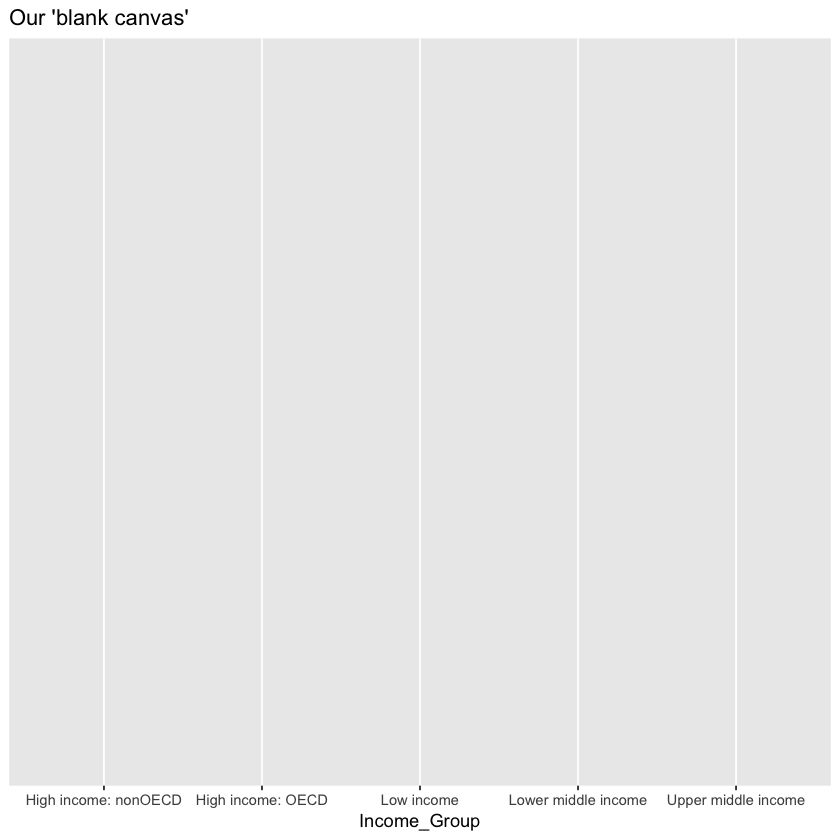

In [39]:
ggplot(CS_data, aes(x=Income_Group)) +
    ggtitle("Our 'blank canvas'")

Using the `geom_bar()` function, we can add in the shapes. By default, the function will look at the column you have provided and total up how many rows are associated with each unique value of income group (your categorical variable).

In your free time, check what happens if you add in an argument to your code so that the `geom_bar` line says `geom_bar(stat="count")`.

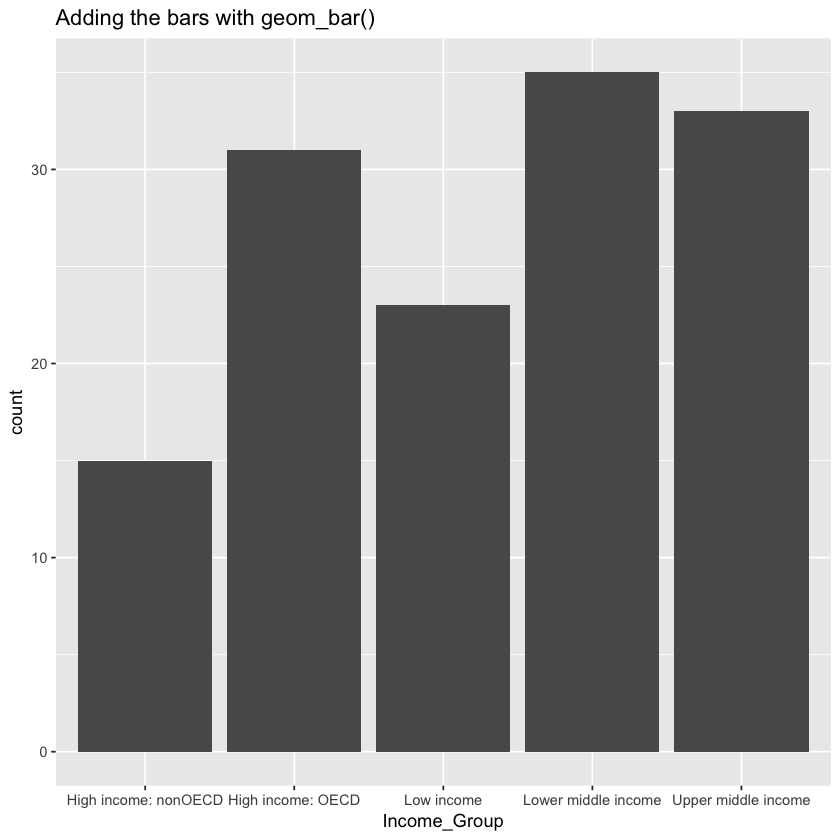

In [40]:
ggplot(CS_data, aes(x=Income_Group)) +
    geom_bar() +
    ggtitle("Adding the bars with geom_bar()")

### Telling a story
We could definitely stop there... But why do we visualize our data at all?

They say a picture tells 1,000 words. I'd say the same for a well-designed data visualization/graphic. **Adding color** and **labels/titles** changes the game data viz entirely. Check out the following two plots and see how they can tell a story way better than the plot above.

**Also notice that choice of x-axis variable/column and coloring can make one variable more pronounced than another.** Which graph tells what story? Which story would you more like to know about these data?

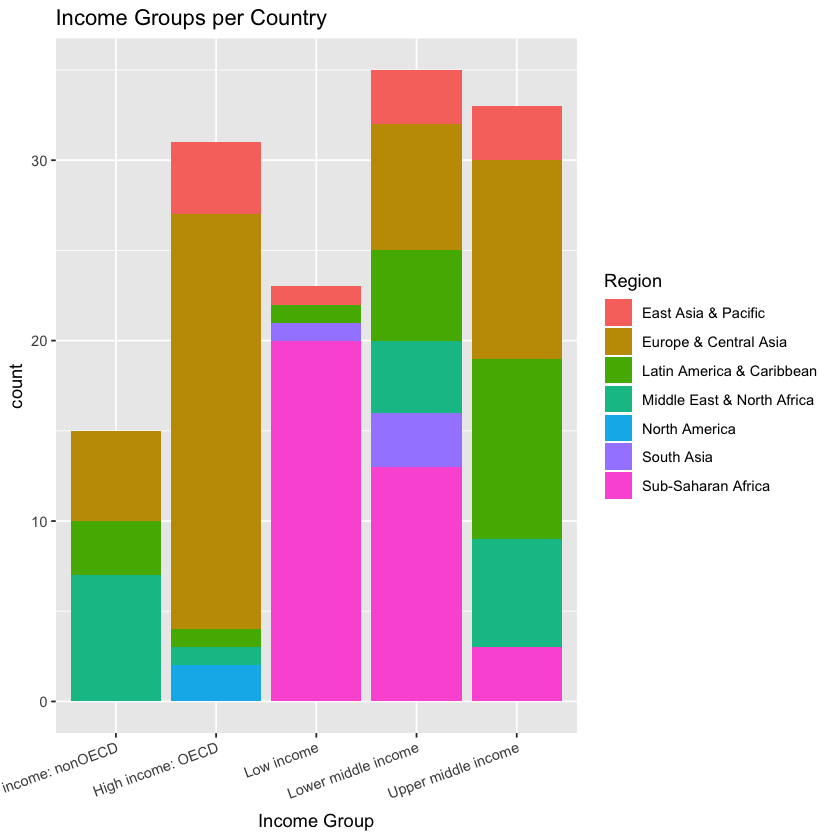

In [41]:
ggplot(CS_data, aes(x=Income_Group)) +
    geom_bar(aes(fill=Region)) +
    xlab("Income Group") +
    ggtitle("Income Groups per Country") +
    theme(axis.text.x = element_text(angle = 20, hjust = 1))

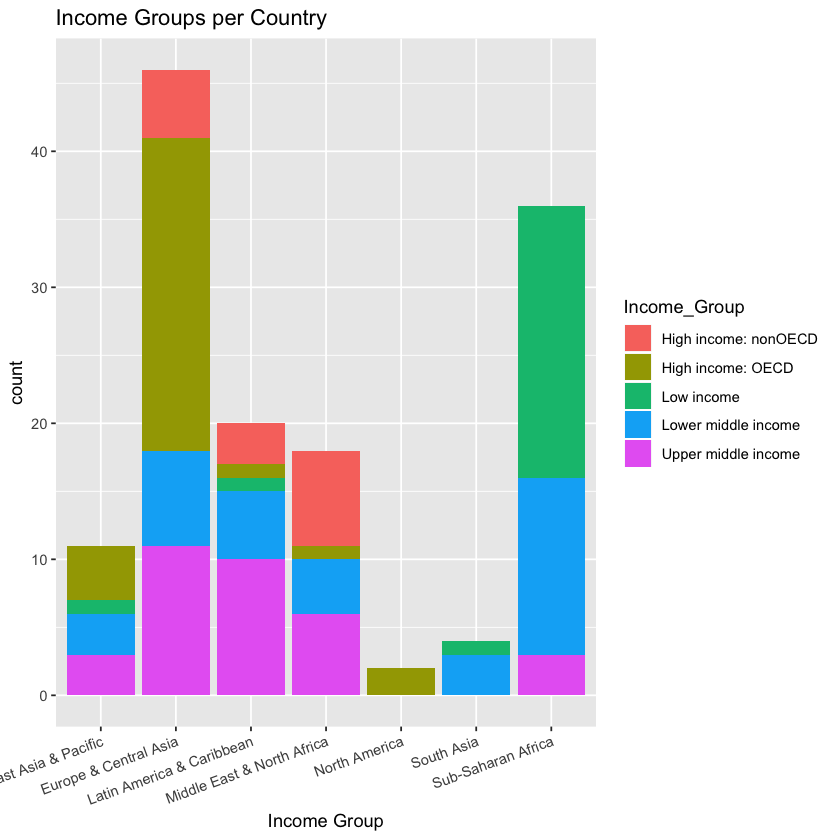

In [42]:
ggplot(CS_data, aes(x=Region)) +
    geom_bar(aes(fill=Income_Group)) +
    xlab("Income Group") +
    ggtitle("Income Groups per Country") +
    theme(axis.text.x = element_text(angle = 20, hjust = 1))

### Histograms
Histograms are a reflection of the counts in your data. Similar values (values that are close enough in number) will be put into the same bin and counted up.

There are two ways to start thinking about grouping values together.
- You can set the number of bins
    - By default, there are 30 bins created
- You can set the exact binwidth/interval size
    - Think [0, binwidth] will define which variables will be counted up in a bar (constitute to a bar's height)

### Number of total bins
Number of bins can be specified. However, I will put the following here.

**Don't use this method. Being specific about your bin size / knowing the size of your bins is completely pivotal to understanding your own work.**

However, for pedagogical purposes, when you edit the amount of bins, notice that the binwidth will change accordingly.

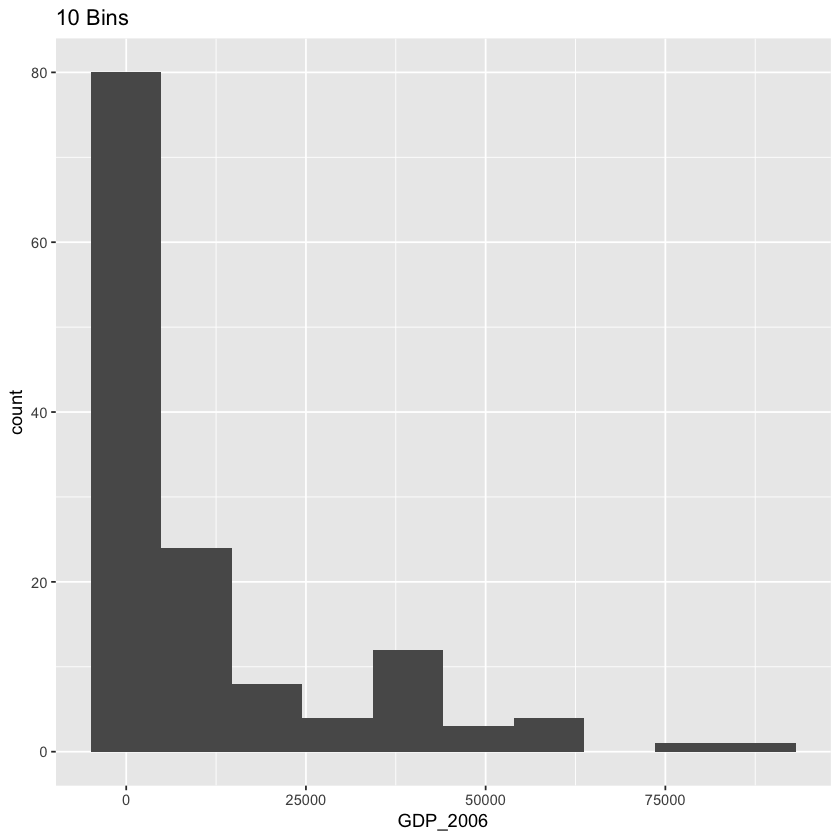

In [43]:
ggplot(CS_data, aes(x = GDP_2006)) +
    geom_histogram(bins=10) +
    ggtitle("10 Bins")

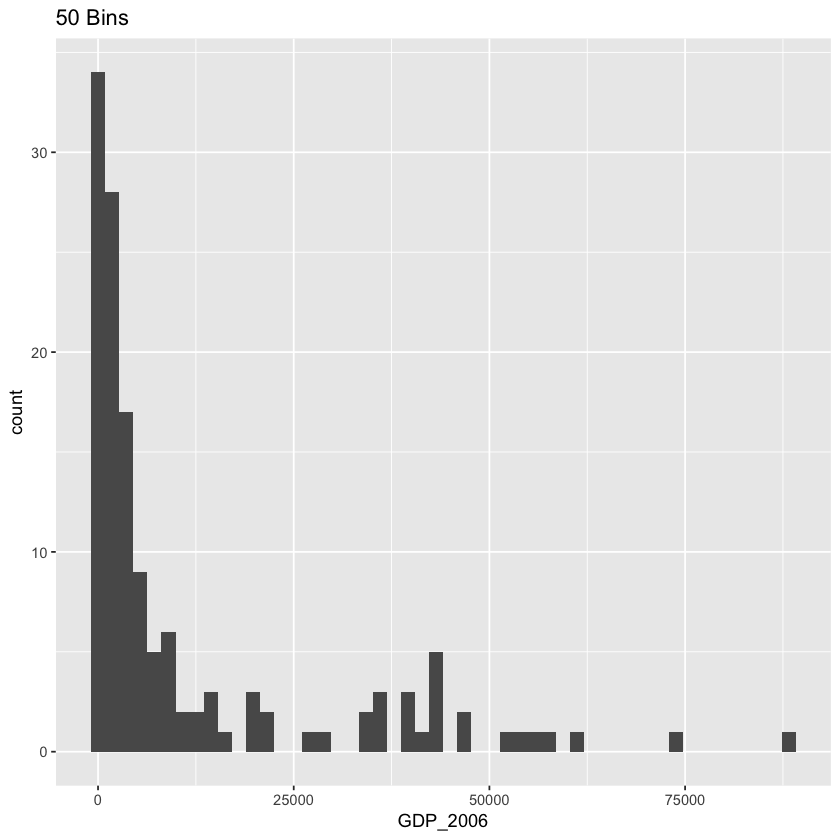

In [44]:
ggplot(CS_data, aes(x = GDP_2006)) +
    geom_histogram(bins=50) +
    ggtitle("50 Bins")

### Binwidth/Interval Length
To tell the best story you can with your visualization, you want to specify binwidth.

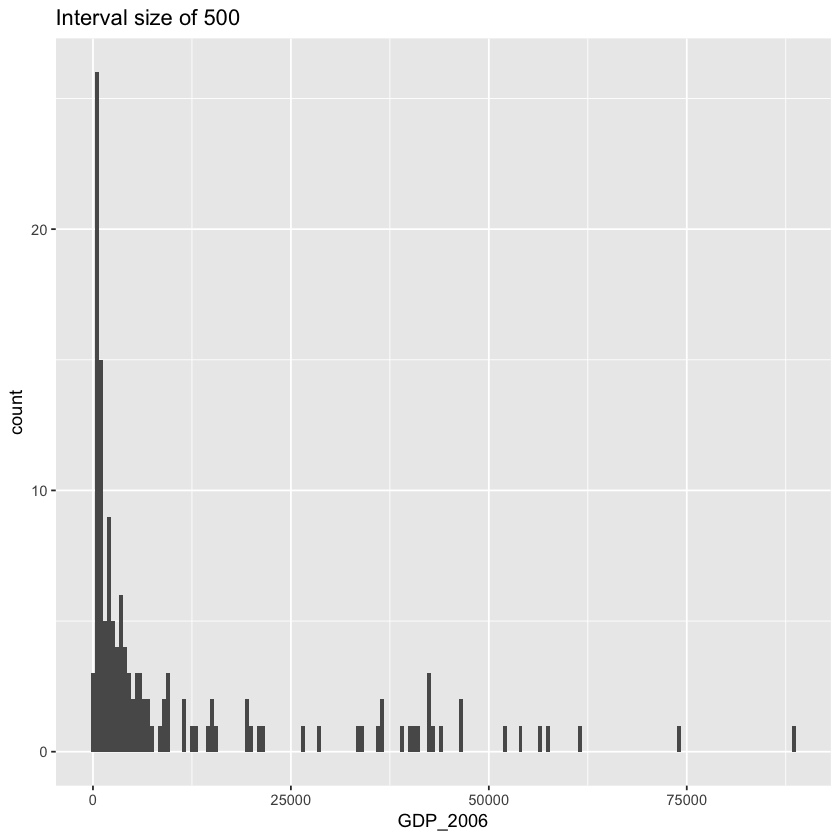

In [45]:
ggplot(CS_data, aes(x = GDP_2006)) +
    geom_histogram(binwidth=500) +
    ggtitle("Interval size of 500")

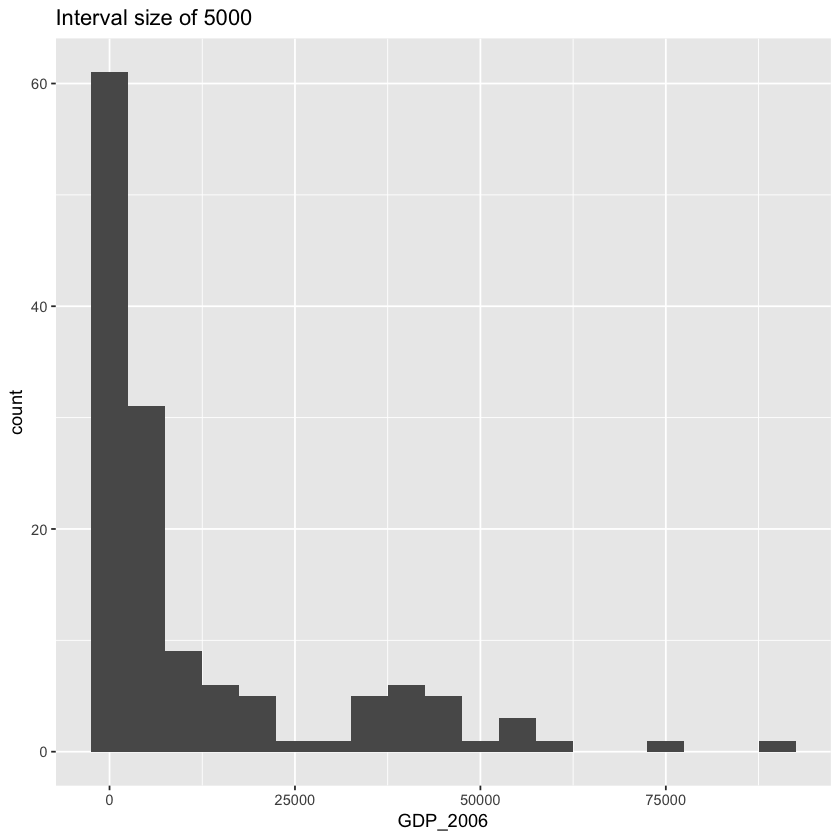

In [46]:
ggplot(CS_data, aes(x = GDP_2006)) +
    geom_histogram(binwidth=5000) +
    ggtitle("Interval size of 5000")

The binwidth of 5000 makes the total amount of bins become smaller. I would argue that binwidth of 5000 tells a better story than binwidth of 500.

What would look even better is if we added some separation between the histogram bars for visual clarity. I'm adding in `col="white", lwd=0.5` as arguments into `geom_histogram()` to achieve this look.

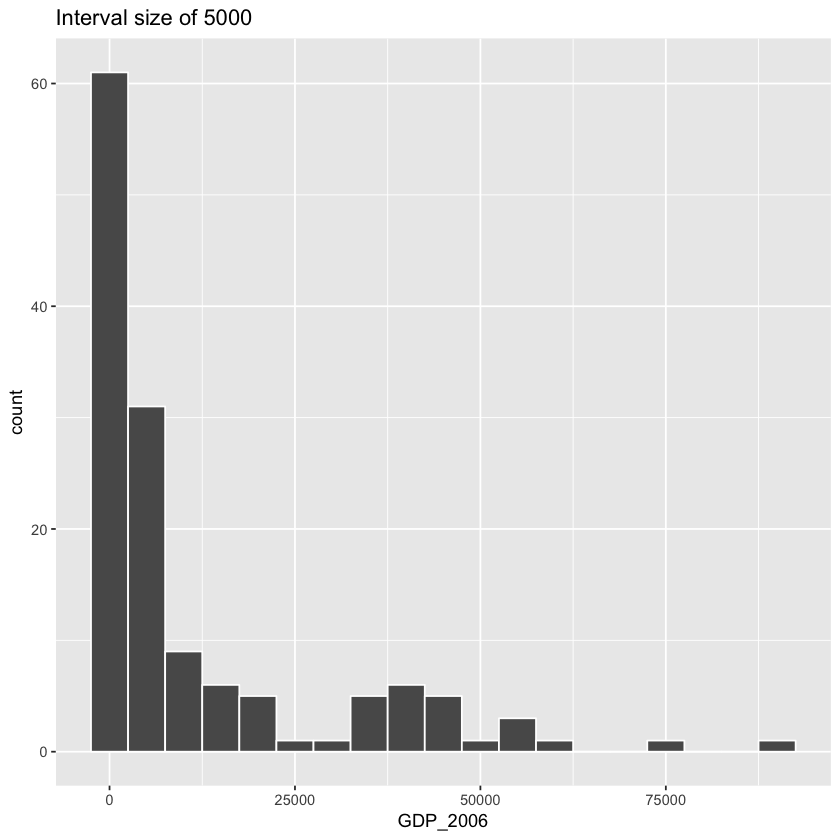

In [47]:
ggplot(CS_data, aes(x = GDP_2006)) +
    geom_histogram(col="white", lwd=0.5, binwidth=5000) +
    ggtitle("Interval size of 5000")

## 4. Libraries? Think of phone apps.
Sometimes, libraries will already be loaded in for you, just by the way our labs are formatted online. Other times, and when you use R in the real world, they won't be. So let's learn about how to load them in.

Libraries give R more functionality.

1. "Install the app to your phone" using `install.packages("insert_library_name")`
    - Yes quotes
2. "Open the app" to use it using `library(insert_library_name)`
    - No quotes
    
### Practice by installing a library
Try installing `xml2`. It's not a library you'll use in this class, but it's pretty popular and worth the installing learning experience.

In [48]:
install.packages("xml2")

Warning message in install.packages("xml2"):
“installation of package ‘xml2’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


Now, load it in.

In [49]:
library(xml2)

Again, notice where there are and where there aren't quotes.

## Conclusion
You learned 4 items today. Remember to pay attention to syntax, and you'll find that patterns will get you very far in this class.

Practice, practice, practice makes perfect.